# Biomedical Engineering Department

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl



In [2]:
##Find dataset for queryed text

def query_data(Q,qq,cleaned_data,query,indx):
    que=Q[Q['Question'].str.contains(query)==True]
    val=que.values
    ind=que.index.values
    print(Q.loc[ind[indx-1],'Question'])
    start=ind[indx-1]
    end=int(qq.iloc[qq[qq.location==str(ind[indx-1])].index+1]['location'])
    df_return=cleaned_data.iloc[:,start:end]
    return df_return

In [3]:
def barplot(data,decimal=0):
    cmap = mpl.cm.Blues(np.linspace(0.4,0.9,100))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    fig,ax=plt.subplots(figsize=(8,4),dpi=150)

    data.plot(kind='bar',colormap=cmap,ax=ax)
    plt.xticks(rotation=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.legend(loc=(1.05,0.4))
    x_offset = -0.1
    y_offset = 0.0
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.0f}".format(b.y1 + b.y0)        
        if decimal==2:
            val = "{:.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2+ x_offset, b.y1+y_offset),fontsize=10)

In [4]:
def stackplot(data,ind):
    cmap = mpl.cm.Blues(np.linspace(0,0.9,100))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    fig,ax=plt.subplots(figsize=(8,6),dpi=150)
    data.plot(kind='barh', stacked=True,colormap=cmap, figsize=(10, 6),ax=ax)
    plt.legend(ind[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
    for n, x in enumerate([*aaa.index.values]):
        m=3
        for (proportion, count, y_loc) in zip(bbb.loc[x],
                                          aaa.loc[x],
                                          bbb.loc[x].cumsum()):
            if m<2:
                 plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{str(np.round(proportion * 100)).split(".")[0]}%',
                          #s=f'{str(count).split(".")[0]}', 
                 color="white",
                 fontsize=8,
                 fontweight="bold")
            if m>=2:
                plt.text(x=(y_loc - proportion) + (proportion / 2)-0.01,
                 y=n - 0.11,
                 s=f'{str(np.round(proportion * 100)).split(".")[0]}%',
                         #s=f'{str(count).split(".")[0]}', 
                 color="black",
                 fontsize=8,
                 fontweight="bold")
            m-=1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [5]:
df2019=pd.read_csv('BMEN/Response2019.csv',header=[1], skipinitialspace=True,index_col=0)
df2022=pd.read_csv('BMEN/Response2022.csv',header=[1], skipinitialspace=True,index_col=0)

In [6]:
Q2022=pd.read_csv("output/Questions-22.csv",index_col=0)
Q2019=pd.read_csv("output/Questions-19.csv",index_col=0)

In [7]:
qq2022=Q2022[Q2022['location']!='False']
qq2022=qq2022.reset_index(drop=True)
qq2019=Q2019[Q2019['location']!='False']
qq2019=qq2019.reset_index(drop=True)

## Basic Statistics

In [8]:
print('\033[1m' + 'There are '+ str(len(df2022)) +' BMEN students taking the questionaire in 2022' + '\033[0m')
print('\n')

print('\033[1m' + 'There are '+ str(len(df2019)) +' BMEN students taking the questionaire in 2019'+ '\033[0m')

There are 138 BMEN students taking the questionaire in 2022


There are 87 BMEN students taking the questionaire in 2019


### Degree

In [9]:
dg=pd.DataFrame(df2019['degree'].value_counts())
dg.rename(columns={"degree":'2019'},inplace=True)
dg['2022']=df2022['degree'].value_counts()
dg.rename(inplace=True,index={'Master of Science (M.S.)':'M.S.','Doctor of Philosophy (Ph.D.)':'Ph.D.'\
                                         ,'Doctor of Engineering Science (Eng.Sc.D.)':'Eng.Sc.D.'})
print('\033[1m' + 'The degree componets of BMEN students in 2019 and 2022 '+'\033[0m')
print(dg)

The degree componets of BMEN students in 2019 and 2022 
                       2019  2022
M.S.                     36  74.0
Ph.D.                    28  43.0
M.S. leading to Ph.D.    22  21.0
Eng.Sc.D.                 1   NaN


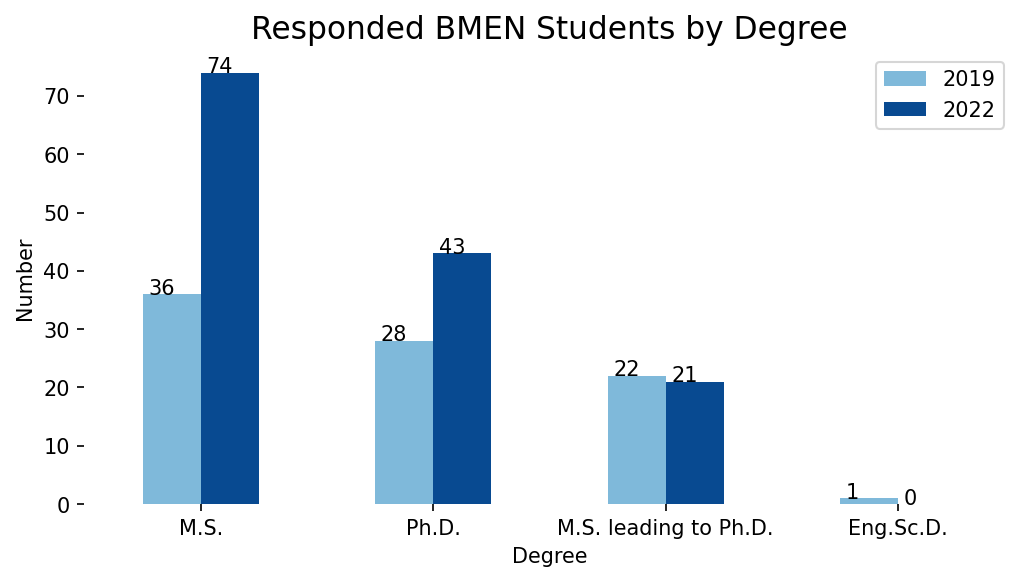

In [10]:
barplot(dg)
plt.ylabel("Number",fontsize=10)
plt.xlabel("Degree",fontsize=10)
plt.title("Responded BMEN Students by Degree",fontsize=15)
plt.show()


### Gender

In [11]:
gender22=query_data(Q2022,qq2022,df2022,'gender',indx=3)
gender19=query_data(Q2019,qq2019,df2019,'gender',indx=3)
gender19.replace('I prefer not to¬†answer','I prefer not to answer',inplace=True)
gender19.rename(columns={'I prefer not to¬†answer':'I prefer not to answer'},inplace=True)

Please indicate the gender(s) with which you identify (check all that apply):
Please¬†indicate¬†the gender(s) with which you identify (check all that apply):


In [12]:
gd=pd.DataFrame(gender19.count())
gd.rename(columns={0:'2019'},inplace=True)
gd['2022']=gender22.count()

gd.rename(inplace=True,index={'Do not identify as female, male, or non-binary':'Do not identify','I prefer not to answer':'Prefer not to answer'})
print('\033[1m' + 'The gender componets of BMEN students in 2019 and 2022 '+'\033[0m')
print(gd)
gd.drop('Prefer to self-describe',inplace=True)
gd.drop('Do not identify',inplace=True)

The gender componets of BMEN students in 2019 and 2022 
                         2019  2022
Female                     47    86
Male                       28    46
Non-binary                  1     5
Do not identify             1     0
Prefer not to answer        4     2
Prefer to self-describe     0     0


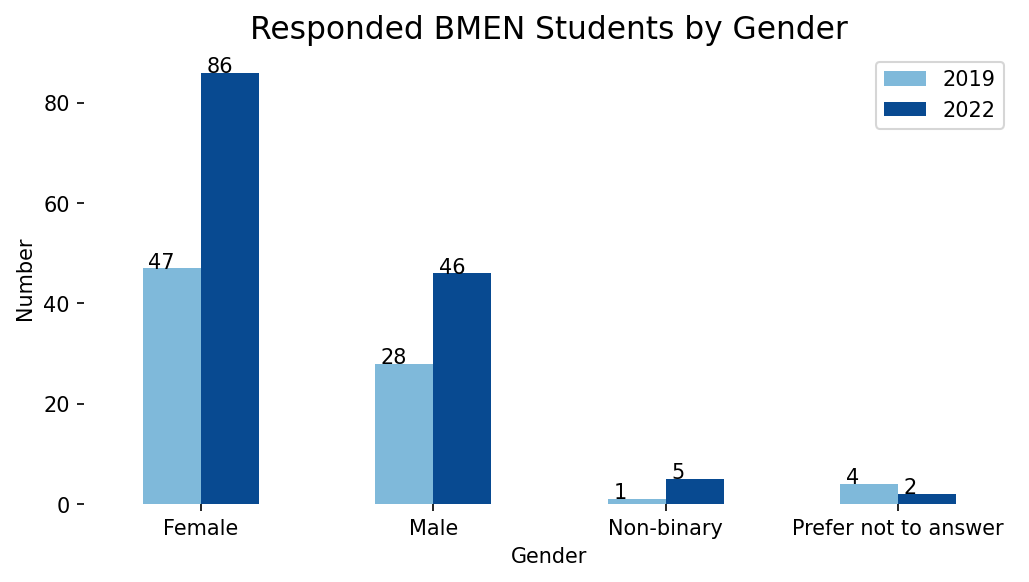

In [13]:
barplot(gd)
plt.ylabel("Number",fontsize=10)
plt.xlabel("Gender",fontsize=10)
plt.title("Responded BMEN Students by Gender",fontsize=15)
plt.show()

### Housing

In [14]:
location22=query_data(Q2022,qq2022,df2022,'reside',indx=1)
location19=query_data(Q2019,qq2019,df2019,'reside',indx=1)

hous=pd.DataFrame(location19['Response.34'].value_counts())
hous.rename(columns={'Response.34':'2019'},inplace=True)
hous['2022']=location22['Response.35'].value_counts()
hous.rename(index={hous.index[1]:'Columbia Residential'},inplace=True)
print('\033[1m' + 'The housing location of BMEN students in 2019 and 2022 '+'\033[0m')
print(hous)

Where do you reside?
Where do you reside?
The housing location of BMEN students in 2019 and 2022 
                      2019  2022
Off-campus              49  89.0
Columbia Residential    37  49.0
International House      1   NaN


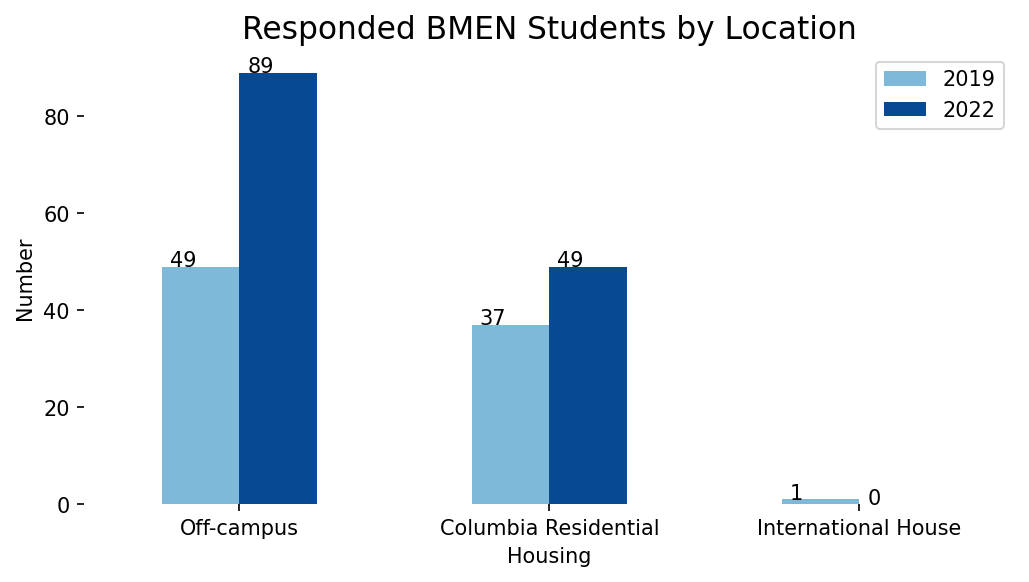

In [15]:
barplot(hous)
plt.ylabel("Number",fontsize=10)
plt.xlabel("Housing",fontsize=10)
plt.title("Responded BMEN Students by Location",fontsize=15)
plt.show()

## Satisfaction of Biomedical Engineering Department

In [16]:
sat2019=query_data(Q2019,qq2019,df2019,'satisfied',indx=1)
sat2022=query_data(Q2022,qq2022,df2022,'satisfied',indx=1)

I am satisfied with my overall experience at Columbia.
I am satisfied with my overall experience at Columbia.


In [17]:
print(f'Mean Satisfaction of 2019 is : {sat2019.mean().sum():0.3f}')
print(f'Mean Satisfaction of 2022 is : {sat2022.mean().sum():0.3f}')

Mean Satisfaction of 2019 is : 3.828
Mean Satisfaction of 2022 is : 3.761


In [18]:
a=pd.DataFrame(((sat2019.Response.value_counts()).sort_index(ascending=True)))
a.rename(columns={"Response":'2019'},inplace=True)
b=(sat2022.Response.value_counts()).sort_index(ascending=True)
a['2022']=(b)
ind=['Strongly agree','Agree','Neither agree \n nor disagree','Disagree','Strongly disagree'][::-1]
a.rename(index={1:ind[0],2:ind[1],3:ind[2],4:ind[3],5:ind[4]},inplace=True)
aa=a.apply(lambda x: x / x.sum(), axis=0)

a

,2019,2022
Strongly disagree,2,5
Disagree,5,9
Neither agree \n nor disagree,13,22
Agree,53,80
Strongly agree,14,22


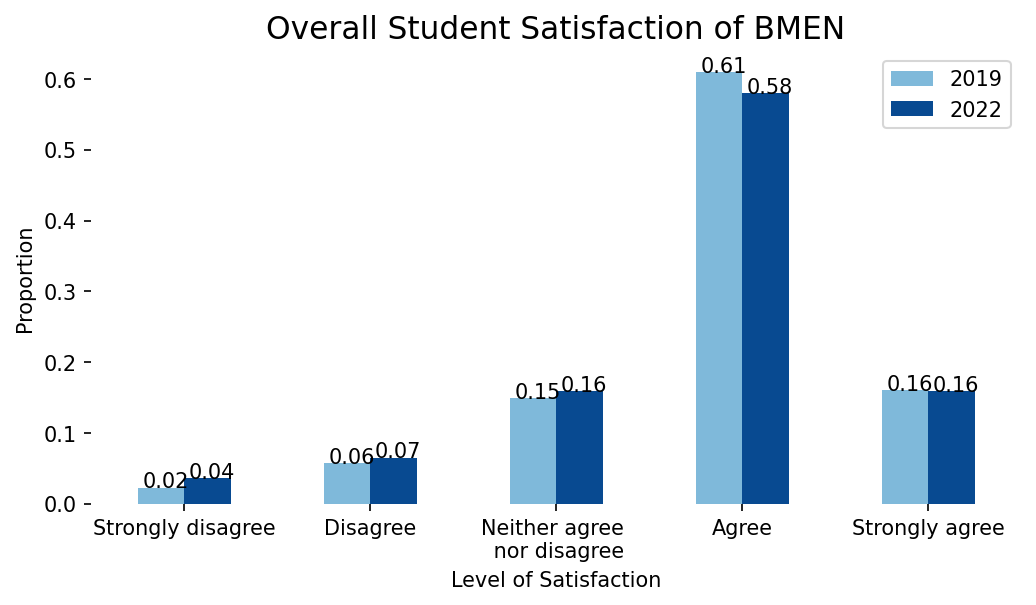

In [19]:

barplot(aa,decimal=2)
plt.ylabel("Proportion",fontsize=10)
plt.xlabel("Level of Satisfaction",fontsize=10)
plt.title("Overall Student Satisfaction of BMEN",fontsize=15)
plt.show()

## Satisfaction v.s Importance

In [20]:
## Satisfaction v.s Importance
important_2019=query_data(Q2019,qq2019,df2019,"important",indx=1)
satisfied2_2019 = query_data(Q2019,qq2019,df2019,"satisfied",indx=2)
important_2022=query_data(Q2022,qq2022,df2022,"important",indx=1)
satisfied2_2022 = query_data(Q2022,qq2022,df2022,"satisfied",indx=2)

The following are important with respect to my overall experience at Columbia.
I am satisfied with the following with respect to my overall experience at Columbia.
The following are important with respect to my overall experience at Columbia.
I am satisfied with the following with respect to my overall experience at Columbia.


In [21]:
a=pd.DataFrame(satisfied2_2019.mean()).T
b=pd.DataFrame(important_2019.mean()).T
b.columns=a.columns
c2019=pd.concat([a,b],ignore_index=True)
c2019.rename(index={0:'Satisfaction',1:'Importance'},inplace=True)
print('\033[1m' + 'The satisfaction and importance of BMEN students in 2019: '+'\033[0m')
c2019

The satisfaction and importance of BMEN students in 2019: 


,Academics,Mental health,Physical health,Professional development,Social life,Career services,Housing,Intercampus Shuttle,Library services,Funding opportunities,Student life and academic advising,Technology services and support
Satisfaction,3.873563,3.436782,3.333333,3.770115,3.609195,3.609195,3.390805,3.160920,3.988506,3.333333,3.586207,3.666667
Importance,4.574713,4.356322,4.333333,4.390805,4.068966,4.298851,4.011494,3.827586,3.931034,4.287356,4.218391,3.977011


In [22]:
a=pd.DataFrame(satisfied2_2022.mean()).T
b=pd.DataFrame(important_2022.mean()).T
b.columns=a.columns
c2022=pd.concat([a,b],ignore_index=True)
c2022.rename(index={0:'Satisfaction',1:'Importance'},inplace=True)
print('\033[1m' + 'The satisfaction and importance of BMEN students in 2022: '+'\033[0m')
c2022

The satisfaction and importance of BMEN students in 2022: 


,Academics,Mental health,Physical health,Professional development,Social life,Career Placement Team,Housing,Intercampus Shuttle/Via Service,Library services,Funding opportunities,Student life and academic advising,Technology services and support
Satisfaction,3.731884,3.268116,3.456522,3.775362,3.739130,3.471014,3.072464,3.427536,3.949275,3.239130,3.586957,3.623188
Importance,4.572464,4.420290,4.275362,4.376812,4.173913,4.181159,4.014493,3.956522,3.811594,4.028986,4.268116,3.927536


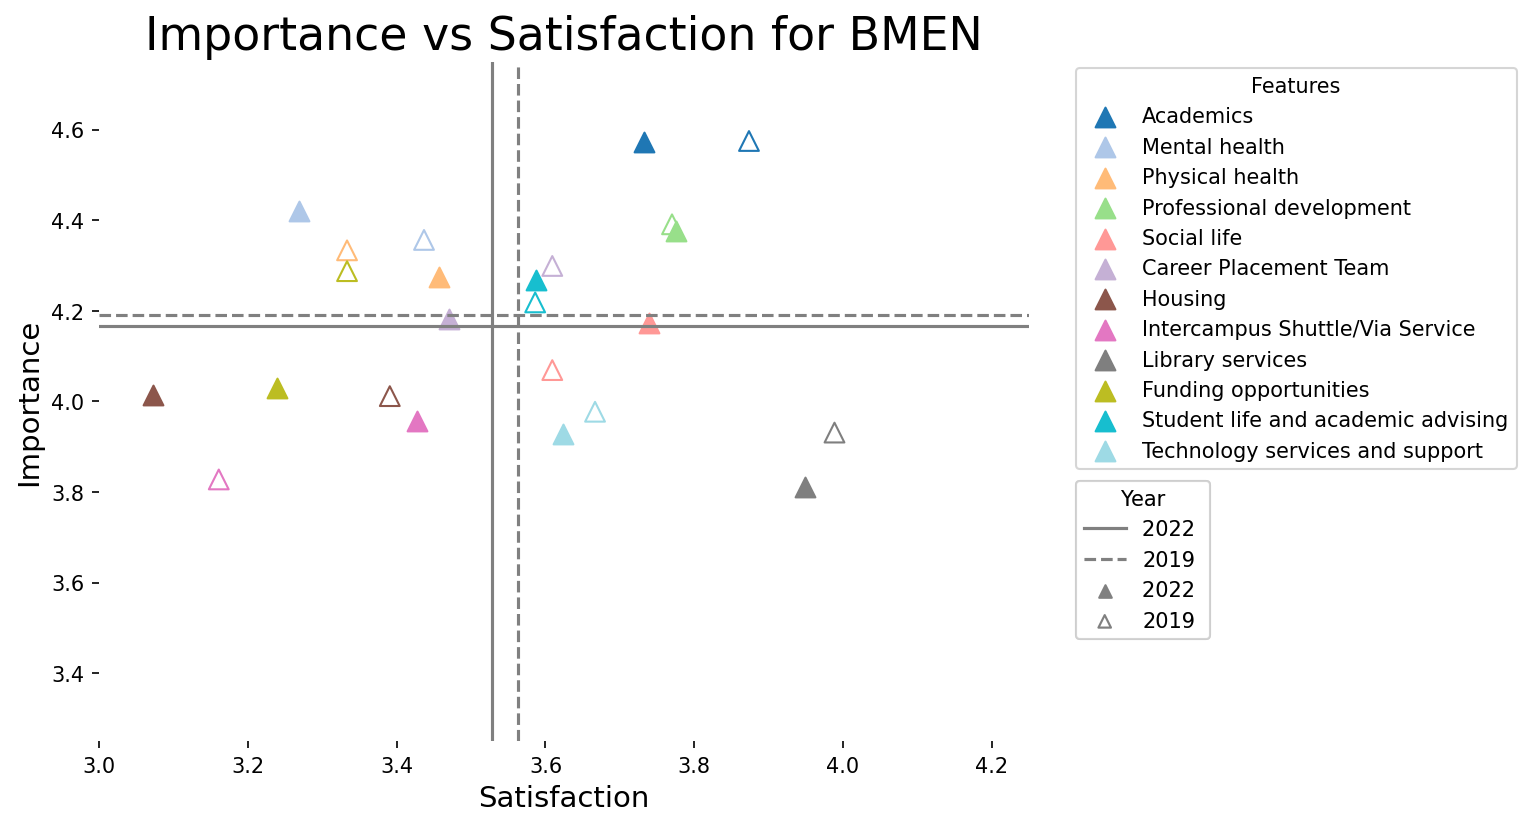

In [23]:
import matplotlib.cm as cm
colors = cm.tab20(np.linspace(0, 1, (12)))

fig,ax=plt.subplots(figsize=(8,6),dpi=150)

for i in range(12):
    ax.scatter(c2022.iloc[0,i], c2022.iloc[1,i],s=90,marker='^',label=c2022.columns[i],c=colors[i].reshape(1,-1))

for i in range(12):
    ax.scatter(c2019.iloc[0,i], c2019.iloc[1,i],s=90,marker='^',facecolors='none',edgecolors=colors[i].reshape(1,-1))

line1=ax.axhline(y=c2022.iloc[1,:].mean(),c='grey')
ax.axvline(x=c2022.iloc[0,:].mean(),c='grey' )

line2=ax.axhline(y=c2019.iloc[1,:].mean(),c='grey',ls='--')
ax.axvline(x=c2019.iloc[0,:].mean(),c='grey' ,ls='--')


ax.set_xlim([3.0, 4.250])
ax.set_ylim([3.25, 4.750])


ax.set_title("Importance vs Satisfaction for BMEN",fontsize=22)

leg = plt.legend(loc=(1.05,0.4), title="Features")
ax.add_artist(leg)
import matplotlib.patches as mpatches

grey_triangle1 = ax.scatter([], [], color='grey', marker='^', linestyle='None')
grey_triangle2 = ax.scatter([], [], color='grey', marker='^', facecolors='none',edgecolors="grey",linestyle='None')

leg1=plt.legend(handles=[line1,line2,grey_triangle1,grey_triangle2], labels=['2022 ','2019','2022 ','2019'],loc=(1.05,0.15), title="Year")
ax.add_artist(leg1)

ax.set_xlabel("Satisfaction",fontsize=14)
ax.set_ylabel("Importance",fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Academics

In [24]:
## Academics
aca_import_2019=query_data(Q2019,qq2019,df2019,"academics",indx=1)
aca_import_2022=query_data(Q2022,qq2022,df2022,"academics",indx=1)
aca=pd.DataFrame(aca_import_2019.mean(axis=0)[:4])
aca.rename(columns={0:'2019'},inplace=True)
aca['2022']=(aca_import_2022.mean(axis=0)[:4])

The following are important with respect to my overall satisfaction with SEAS classes and academics.
The following are important with respect to my overall satisfaction with SEAS classes and academics.


In [25]:
print('\033[1m'+'The satisfaction score with SEAS classes and academics of BMEN in 2019 and 2022: '+'\033[0m'+'(out of 5)')
print(aca)
aca.rename(index={'Supplementary educational tools':'Supplementary \n educational tools'},inplace=True)

The satisfaction score with SEAS classes and academics of BMEN in 2019 and 2022: (out of 5)
                                     2019      2022
Instruction                      4.425287  4.355072
Course content                   4.413793  4.362319
Supplementary educational tools  3.724138  3.804348
Degree requirements              3.942529  3.971014


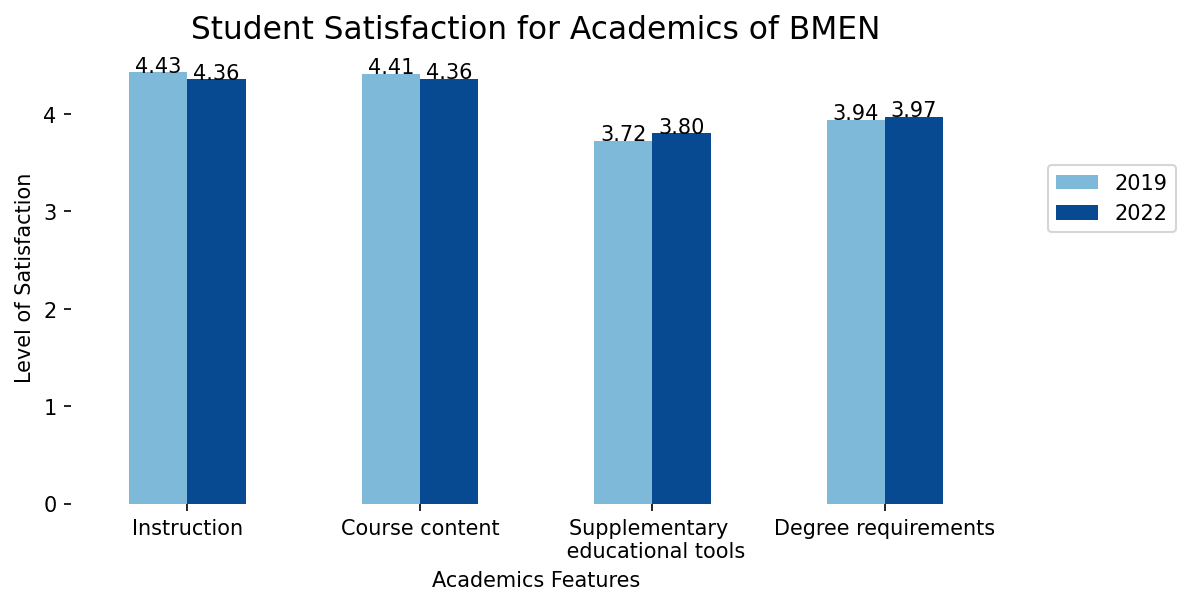

In [26]:
barplot(aca,decimal=2)
plt.ylabel("Level of Satisfaction",fontsize=10)
plt.xlabel("Academics Features",fontsize=10)
plt.title("Student Satisfaction for Academics of BMEN",fontsize=15)
plt.legend(loc=(1.05,0.6))
plt.show()


## Academics: Integrity

### The Academic Integrity Policies

In [27]:
communicated = df2022['The academic integrity policies were clearly communicated:']
enforced = df2022['The academic integrity policies were enforced by TAs or course instructors:']
classmates = df2022['My classmates adhered to the university policies on academic integrity:']
communicated19 = df2019['The academic integrity policies were clearly communicated:']
enforced19 = df2019['The academic integrity policies were enforced by TAs or course instructors:']
classmates19 = df2019['My classmates adhered to the university policies on academic integrity:']


aca_in_pol=pd.DataFrame([[communicated19.mean(),communicated.mean()],\
              [enforced19.mean(),enforced.mean()],\
              [classmates19.mean(),classmates.mean()]],columns=['2019','2022'],\
             index=['Clearly communicated','Enforced by TAs/Instructors','Adhered by classmates'])
print('\033[1m'+'The score of academic integrity policies of BMEN in 2019 and 2022: '+'\033[0m'+'(out of 5)')
print(aca_in_pol)

The score of academic integrity policies of BMEN in 2019 and 2022: (out of 5)
                                 2019      2022
Clearly communicated         4.172414  4.130435
Enforced by TAs/Instructors  4.045977  3.949275
Adhered by classmates        3.965517  3.920290


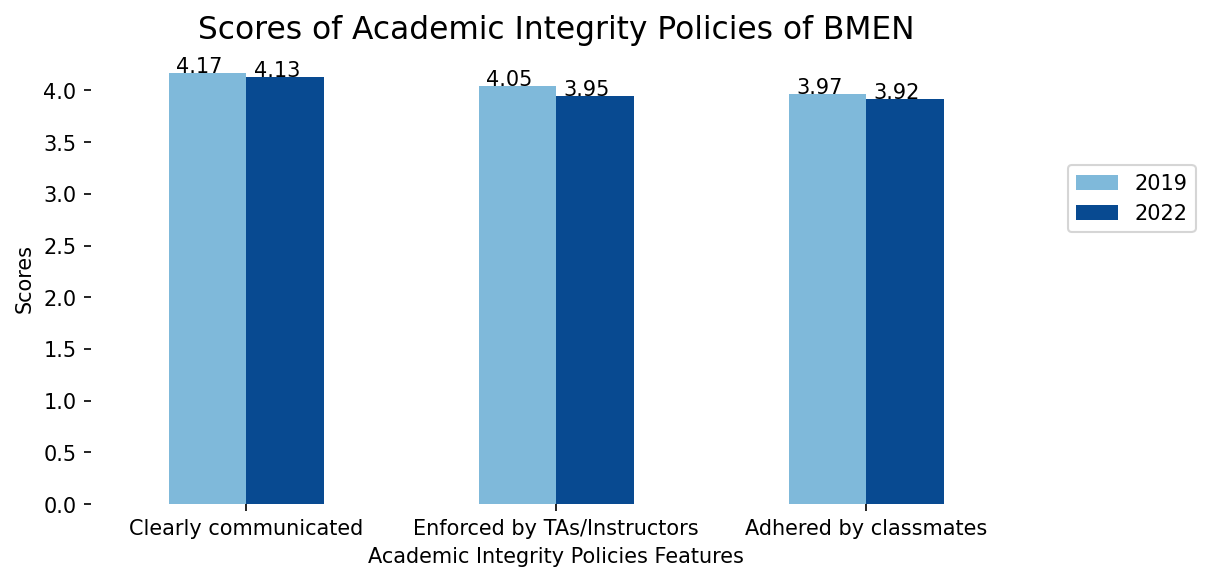

In [28]:
barplot(aca_in_pol,decimal=2)
plt.ylabel("Scores",fontsize=10)
plt.xlabel("Academic Integrity Policies Features",fontsize=10)
plt.title("Scores of Academic Integrity Policies of BMEN",fontsize=15)
plt.legend(loc=(1.05,0.6))
plt.show()

### Violation

In [29]:
print('\033[1m' + 'The Academic Integrity of BMEN students in 2019 and 2022 '+'\033[0m')
aca4_int19=query_data(Q2019,qq2019,df2019,"Integrity",indx=4)
aca4_int22=query_data(Q2022,qq2022,df2022,"Integrity",indx=4)
aca4_int=pd.DataFrame(aca4_int19['Response.46'].value_counts())
aca4_int.rename(columns={'Response.46':'2019'},inplace=True)
aca4_int['2022']=aca4_int22['Response.48'].value_counts()
print(aca4_int)

The Academic Integrity of BMEN students in 2019 and 2022 
Have you ever violated an Academic Integrity policy? (all answers are anonymous)
Have you ever violated an Academic Integrity policy? (all answers are anonymous)
          2019  2022
No          79   123
Not Sure     4     9
Yes          4     6


### Awareness

In [30]:
print('\033[1m' + 'The Academic Integrity Awareness of BMEN students in 2019 and 2022 '+'\033[0m')
aca_int19=query_data(Q2019,qq2019,df2019,"Integrity",indx=1)
aca_int22=query_data(Q2022,qq2022,df2022,"Integrity",indx=1)
aca_int=pd.DataFrame(aca_int19['Response.43'].value_counts())
aca_int.rename(columns={'Response.43':'2019'},inplace=True)
aca_int['2022']=aca_int22['Response.45'].value_counts()
print(aca_int)

The Academic Integrity Awareness of BMEN students in 2019 and 2022 
Have you ever become aware of an Academic Integrity violation? 
Have you ever become aware of an Academic Integrity violation? 
          2019  2022
No          64   108
Yes         12    14
Not Sure    11    16


In [31]:
print('\033[1m' + 'The Academic Integrity Awareness of BMEN students from TAs in 2019 and 2022 '+'\033[0m')
aca_int19=query_data(Q2019,qq2019,df2019,"Integrity",indx=2)
aca_int22=query_data(Q2022,qq2022,df2022,"Integrity",indx=2)
aca_int=pd.DataFrame(aca_int19['Response.45'].value_counts())
aca_int.rename(columns={'Response.45':'2019'},inplace=True)
aca_int['2022']=aca_int22['Response.47'].value_counts()
print(aca_int)

The Academic Integrity Awareness of BMEN students from TAs in 2019 and 2022 
If you have served as a TA, did you ever suspect or become aware of an Academic Integrity Violation?
If you have served as a TA, did you ever suspect or become aware of an Academic Integrity Violation?
                         2019  2022
I did not serve as a TA    52    83
No                         28    43
Yes                         7    12


### Report

In [32]:
aca_r19=query_data(Q2019,qq2019,df2019,"report it?",indx=1).dropna()
aca_r22=query_data(Q2022,qq2022,df2022,"report it?",indx=1).dropna()
aca_r=pd.DataFrame(aca_r19['Response.44'].value_counts())
aca_r.rename(columns={'Response.44':'2019'},inplace=True)
aca_r['2022']=aca_r22['Response.46'].value_counts()
print(aca_r)

If you answered "Yes," did you report it?
Did you report it?
                                                2019  2022
No                                                 8    10
Yes, I reported it to both TA and Instructor       3     1
Yes, I reported it to the Instructor/Professor     2     4


## PDL

### Attendence M.S. Students only

In [33]:
pdl_A19=query_data(Q2019,qq2019,df2019[df2019['degree']=='Master of Science (M.S.)'],"PDL",indx=1).fillna("NA")
pdl_A22=query_data(Q2022,qq2022,df2022[df2022['degree']=='Master of Science (M.S.)'],"PDL",indx=1).fillna("NA")
pdl_A=pd.DataFrame(pdl_A19['Response.5'].value_counts())
pdl_A.rename(columns={'Response.5':'2019'},inplace=True)
pdl_A['2022']=pdl_A22['Response.5'].value_counts()
print(pdl_A)

Did you attend the Professional Development and Leadership (PDL) Program?
Did you attend the Professional Development and Leadership (PDL) Program?
     2019  2022
Yes    34    73
No      2     1


In [34]:
pdl_c19=query_data(Q2019,qq2019,df2019[df2019['degree']=='Master of Science (M.S.)'],"PDL",indx=2)
pdl_c22=query_data(Q2022,qq2022,df2022[df2022['degree']=='Master of Science (M.S.)'],"PDL",indx=2)
pdl_c=pd.DataFrame(pdl_c19['Response.6'].value_counts())
pdl_c.rename(columns={'Response.6':'2019'},inplace=True)
pdl_c['2022']=pdl_c22['Response.6'].value_counts()
print(pdl_c.sort_index())


I am satisfied with the PDL Core Modules.
I am satisfied with the PDL Core Modules.
     2019  2022
1.0     1     3
2.0     1     7
3.0     2    13
4.0    25    37
5.0     5    13


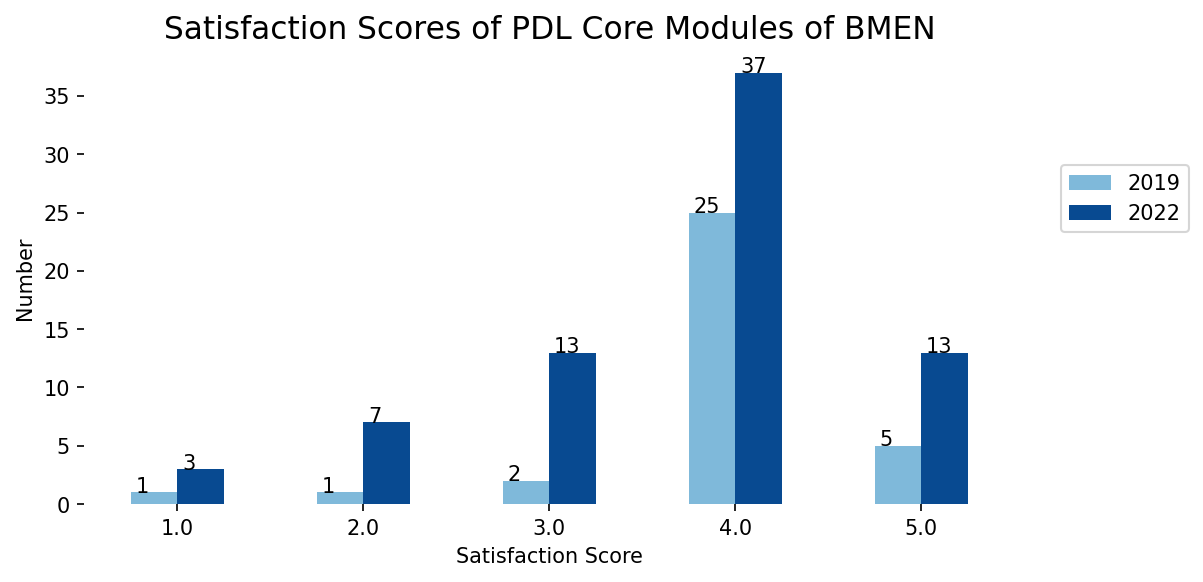

In [35]:
barplot(pdl_c.sort_index())
plt.ylabel("Number",fontsize=10)
plt.xlabel("Satisfaction Score",fontsize=10)
plt.title("Satisfaction Scores of PDL Core Modules of BMEN",fontsize=15)
plt.legend(loc=(1.05,0.6))
plt.show()

In [36]:
pdl_s19=query_data(Q2019,qq2019,df2019[df2019['degree']=='Master of Science (M.S.)'],"PDL",indx=3)
pdl_s22=query_data(Q2022,qq2022,df2022[df2022['degree']=='Master of Science (M.S.)'],"PDL",indx=3)
pdl_s=pd.DataFrame(pdl_s19['Response.7'].value_counts())
pdl_s.rename(columns={'Response.7':'2019'},inplace=True)
pdl_s['2022']=pdl_s22['Response.7'].value_counts()
print(pdl_s.sort_index())

I am satisfied with the PDL Elective Modules.
I am satisfied with the PDL Elective Modules.
     2019  2022
1.0     1     3
2.0     1     4
3.0     1    16
4.0    26    36
5.0     5    14


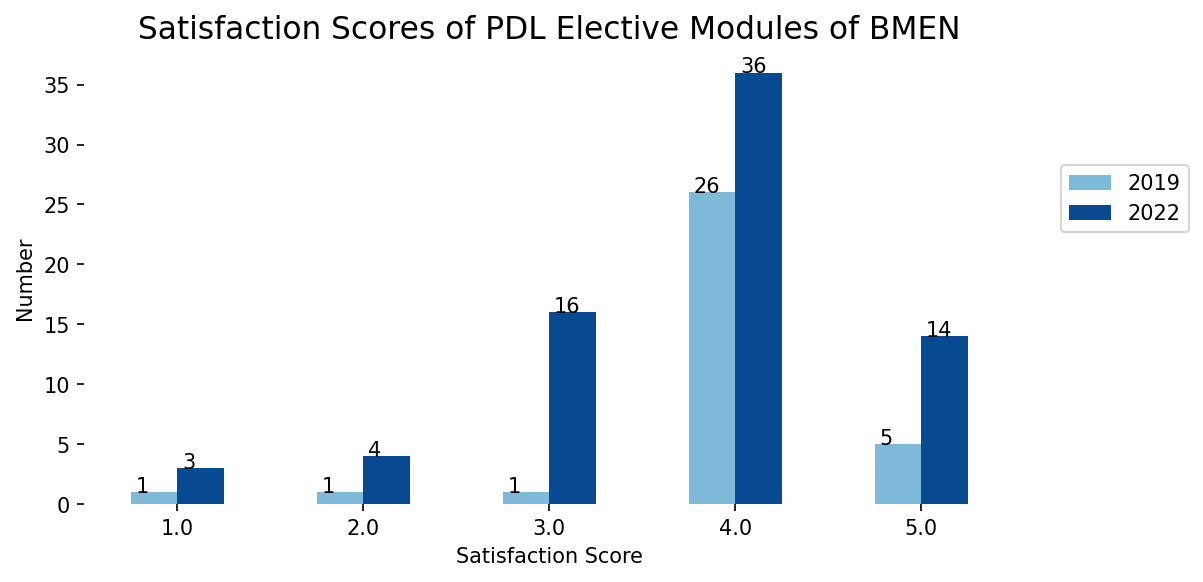

In [37]:
barplot(pdl_s.sort_index())
plt.ylabel("Number",fontsize=10)
plt.xlabel("Satisfaction Score",fontsize=10)
plt.title("Satisfaction Scores of PDL Elective Modules of BMEN",fontsize=15)
plt.legend(loc=(1.05,0.6))
plt.show()

## Career Development

In [38]:
lookingforjob=query_data(Q2022,qq2022,df2022,"looking for a job",indx=1)
lookingforjob.value_counts()

Are you currently looking for a job or plan to look for one in the near future?


Response.10
Yes            85
No             40
Not Sure       13
dtype: int64

In [39]:
jobres=query_data(Q2022,qq2022,df2022,"job search",indx=1)
jobres['looking']=lookingforjob

The following resources have been/were useful in aiding my job search:


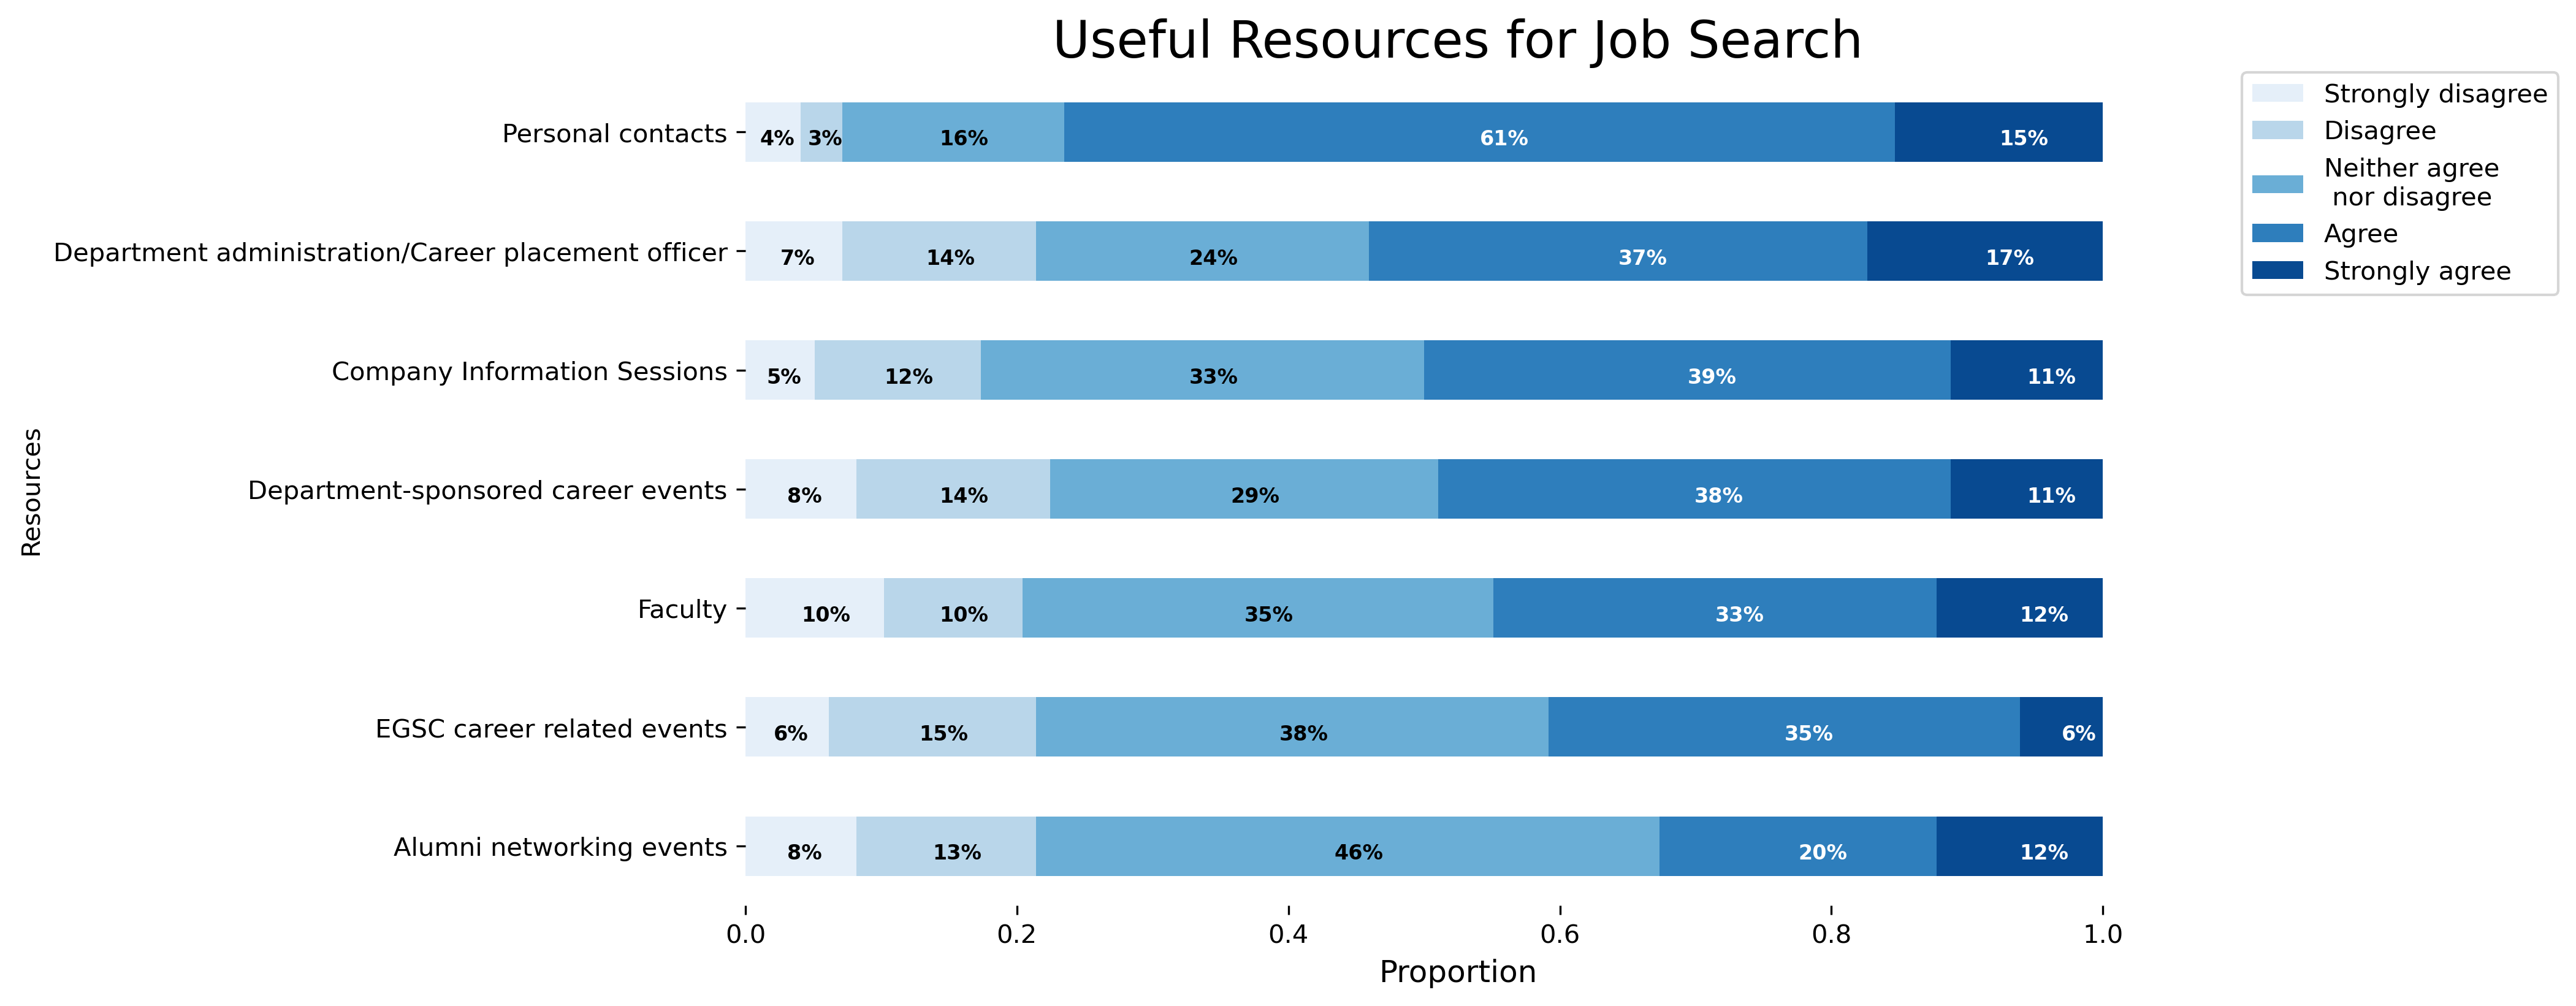

In [41]:
inddd=['Strongly agree','Agree','Neither agree \n nor disagree','Disagree','Strongly disagree']
cmap = mpl.cm.Blues(np.linspace(0,0.9,100))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
lokres=jobres[jobres['looking']!="No"].drop(columns="looking")
lokres_count=lokres.apply(pd.value_counts,axis=0)
d_=lokres_count[(lokres_count.iloc[3:,:].sum()).sort_values().index]
b_prob=d_.apply(lambda x: x / x.sum(), axis=0)
aaa=d_.T
bbb=b_prob.T


fig,ax=plt.subplots(figsize=(8,6),dpi=300)
bbb.plot(kind='barh', stacked=True,colormap=cmap, figsize=(10, 6),ax=ax)
#pd.DataFrame(b) 
plt.legend(inddd[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)

plt.ylabel("Resources")
plt.xlabel("Proportion",fontsize=12)
plt.title("Useful Resources for Job Search",fontsize=20)


for n, x in enumerate([*aaa.index.values]):
    m=5
    for (proportion, count, y_loc) in zip(bbb.loc[x],
                                          aaa.loc[x],
                                          bbb.loc[x].cumsum()):
        
        if m<3:
                 plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 #s=f'{str(count).split(".")[0]}', 
                 s=f'{str(np.round(proportion * 100)).split(".")[0]}%',
                 color="white",
                 fontsize=8,
                 fontweight="bold")
        if m>=3:
                plt.text(x=(y_loc - proportion) + (proportion / 2)-0.01,
                 y=n - 0.11,
                 #s=f'{str(count).split(".")[0]}', 
                 s=f'{str(np.round(proportion * 100)).split(".")[0]}%',
                 color="black",
                 fontsize=8,
                 fontweight="bold")
        m-=1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.show()

## Skills Improved

In [42]:
skill=query_data(Q2022,qq2022,df2022,"skills",indx=1)
skill.replace(2,1,inplace=True)
skill.replace(4,5,inplace=True)
skill_count=skill.apply(pd.value_counts,axis=0).sort_index()
b_prob=(skill_count[(skill_count.iloc[2:,:].sum()).sort_values().index]).apply(lambda x: x / x.sum(), axis=0)
aaa=(skill_count[(skill_count.iloc[2:,:].sum()).sort_values().index]).T
bbb=b_prob.T
bbb.rename(columns={1:'Disagree',3:'Neither agree nor disagree',5:'Agree'})

The following skills have been improved/enhanced by my time at Columbia SEAS.


,Disagree,Neither agree nor disagree,Agree
Non-technical writing skills,0.217391,0.289855,0.492754
Interacting with Industry professionals,0.173913,0.268116,0.557971
Time management,0.123188,0.210145,0.666667
Leadership skills,0.101449,0.224638,0.673913
Technical writing skills,0.108696,0.188406,0.702899
Working in a team,0.079710,0.159420,0.760870
Presentation skills,0.050725,0.181159,0.768116
Facilitating conversations and discussions,0.043478,0.166667,0.789855
Keeping up with latest advances in my field,0.072464,0.115942,0.811594
Proficiency and expertise in my field,0.057971,0.065217,0.876812


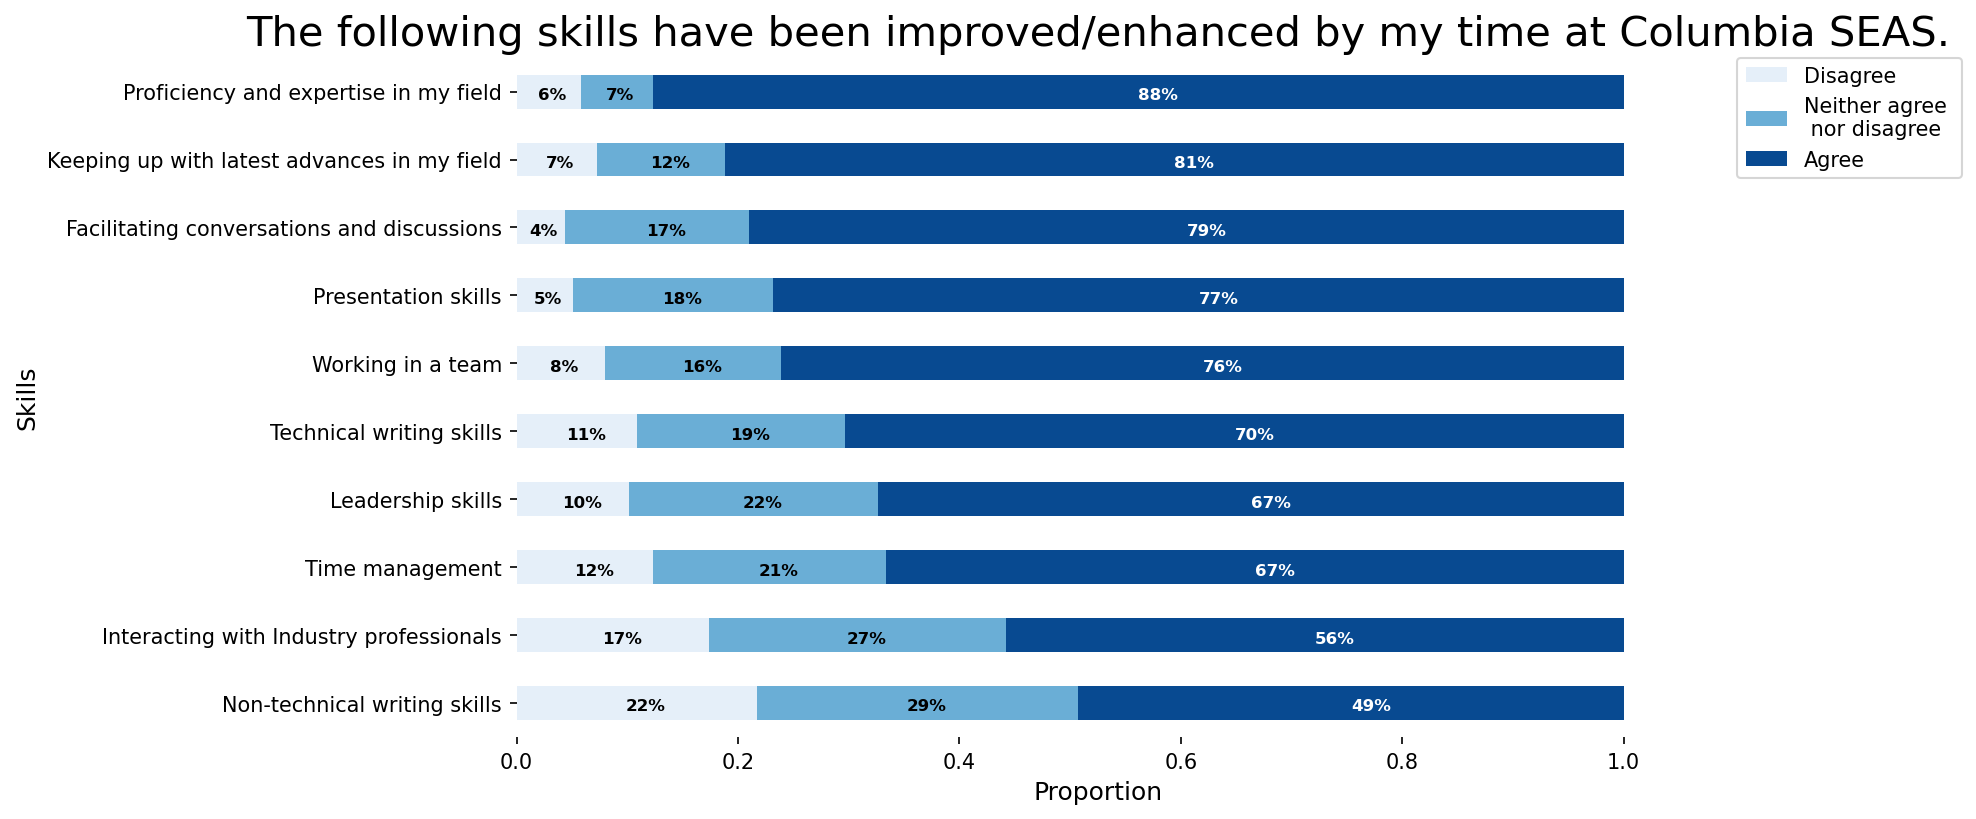

In [43]:
ind=['Agree','Neither agree \n nor disagree','Disagree']
stackplot(bbb,ind)
plt.ylabel("Skills",fontsize=12)
plt.xlabel("Proportion",fontsize=12)
plt.title("The following skills have been improved/enhanced by my time at Columbia SEAS.",fontsize=20)
plt.show()
